# EXPLORATORY DATA  ANALYSIS

EDA is the most crucial stage of any data driven model whether regression or classification, but often understated or ignored. 
EDA gives the clear picture of data and dependency of different features or combination of various features of data on the output.

Contents:
1. Introduction of dataset
2. Looking into the data
3. Univariate analysis
    - Using Probability Density Function
    - Using Cumulative Density Functiton
    - Using Box plot
    - Violin plot
4. Bivariate analysis
    - Using Scatter plot
    - Using Pair plot


# 1. INTRODUCTION OF DATASET

Let's start with few commonly used terms:
- Data-set is the data used ( like tables )
- Data-point or vector or observation is each observation in the data set (like row)
- Label or depdendent-variable or output-varible or Class or Class-label or Response label is the variable to be predicted or analysed.
- Feature or variable or input-variable or independent-varibale is the set of variable( like column) used to determine the dependent variable.


We are using Haberman's Survival Data set from kaggle. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)

Attribute Information:
- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

Objective : 
To classify all the data points into two classes of survival status based on age, opertaion year, axilllary nodes

# 2. LOOKING INTO THE DATA 

In [55]:
import pandas as pd
data = pd.read_csv('haberman_data.csv')

In [2]:
data.shape

(305, 4)

In [3]:
data.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [4]:
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Here, the data doesnot have any headers(column names). The first data point is taken as header. Hence, we need to add headers to understand clearly.


In [84]:
header_list=['age','op_year','axil_nodes','surv_status']
haberman_data = pd.read_csv('haberman_data.csv',names=header_list)

In [85]:
haberman_data.shape

(306, 4)

In [86]:
haberman_data.shape[1]

4

In [87]:
haberman_data.columns

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')

In [88]:
haberman_data.head()

,age,op_year,axil_nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [89]:
haberman_data['surv_status'].unique()

array([1, 2], dtype=int64)

In [90]:
haberman_data['surv_status'].value_counts()

1    225
2     81
Name: surv_status, dtype: int64

The data is clearly imbalanced data, which means the number of data points in each class of 'surv_status' are not similar.

In [91]:
haberman_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          306 non-null    int64
 1   op_year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [92]:
haberman_data.describe()

,age,op_year,axil_nodes,surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# 3. UNIVARAITE ANALYSIS

Univaraite analysis means analysis using a single variable. This analysis gives the frequency/count of occurences of the variable and lets us understand the distribution range of that variable.

Probability Density Function:
In PDF plot, the X-axis is the feature on which analysis is done and The Y-axis is the count/frequency of occurence of that particular X-axis value in the data. Hence the name Density in pdf.

In [93]:
import seaborn as sns
sns.set_style("whitegrid")

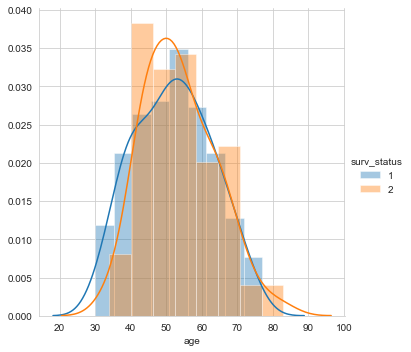

In [94]:
sns.FacetGrid(haberman_data,hue='surv_status',height=5).map(sns.distplot,'age').add_legend()

Observations : 
1. Major overlapping is observed, so we can not clearly say about the dependency of age on the survival.
2. A rough estimate that 20-50 have slightly higher rate of survival and 75-90 have lower rate of survival.
3. Age can be considered as a dependent variable.

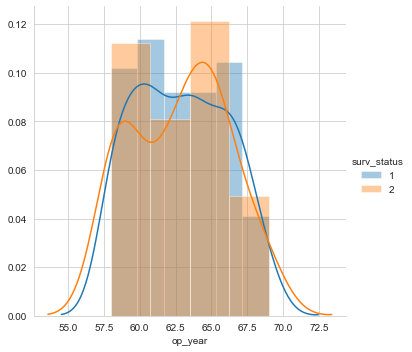

In [95]:
sns.FacetGrid(haberman_data,hue='surv_status',height=5).map(sns.distplot,'op_year').add_legend()

Observaations:
1. The overlap is huge.
2. Operation year alone is not a highly dependent variable.

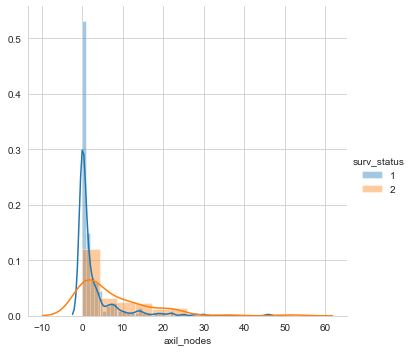

In [96]:
sns.FacetGrid(haberman_data,hue='surv_status',height=5).map(sns.distplot,'axil_nodes').add_legend()

Observations:
1. Patients with 0 nodes have high probability of survival.
2. Axillary nodes can be used as a dependent variable.

Disadvantage of PDF:
In pdf we cant say exactly how many data points are in a range/ lower to a value/ higher than a value. 


Cumulative Distribution Function :
To know the number of data points below/above a particular value which is called percentile of values , CDF is very useful.

In [97]:
survival_yes = haberman_data[haberman_data['surv_status']==1]
survival_no = haberman_data[haberman_data['surv_status']==2]

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


Text(0, 0.5, 'FREQUENCY')

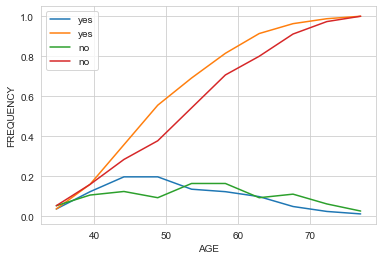

In [98]:
import numpy as np
import matplotlib.pyplot as plt
count, bin_edges = np.histogram(survival_no['age'], bins=10, density = True)
#count : the number of data points at that particular age value
#bin_edges :the seperation values of the X-axis (the feature under analysis)
#bins = the number of buckets of seperation
pdf = count/sum(count)
print(pdf)
# To get cdf, we want cumulative values of the count. In numpy, cumsum() does cumulative sum 
cdf = np.cumsum(pdf)
print(cdf)

count, bin_edges = np.histogram(survival_yes['age'], bins=10, density = True)
pdf2 = count/sum(count)
cdf2 = np.cumsum(pdf2)

plt.plot(bin_edges[1:],pdf,label='yes')
plt.plot(bin_edges[1:], cdf,label='yes')
plt.plot(bin_edges[1:],pdf2,label='no')
plt.plot(bin_edges[1:], cdf2,label='no')
plt.legend()
 #adding labels
plt.xlabel("AGE")
plt.ylabel("FREQUENCY")

From CDF of the age, we observe that there are around 80% of data points have age values less than or equal to 60

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


Text(0, 0.5, 'FREQUENCY')

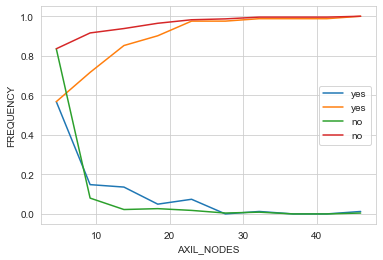

In [78]:
count, bin_edges = np.histogram(survival_no['axil_nodes'], bins=10, density = True)
pdf = count/sum(count)
print(pdf)

cdf = np.cumsum(pdf)
print(cdf)

count, bin_edges = np.histogram(survival_yes['axil_nodes'], bins=10, density = True)
pdf2 = count/sum(count)
cdf2 = np.cumsum(pdf2)

plt.plot(bin_edges[1:],pdf,label='yes')
plt.plot(bin_edges[1:], cdf,label='yes')
plt.plot(bin_edges[1:],pdf2,label='no')
plt.plot(bin_edges[1:], cdf2,label='no')
plt.legend()
plt.xlabel("AXIL_NODES")
plt.ylabel("FREQUENCY")

From CDF of the axil_node, we observe that there are around 90% of data points have axil_node values less than or equal to 10

BOX PLOTS

In [99]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

Before exploring box plots, few commonly used statistics terms are,
- median (50th quartile) is the middle most value of the sorted data
- 25th quartile is the value in sorted data which has 25% of the data less than it and 75% of the data above it
- 75th quartile is the value in sorted data which has 75% of the data less than it and 25% of the data above it.

In the box plot,the lower line represents the 25th quartile, the middle line represents Median/50th quartile, the upper line represents the 75th quartile. And the whiskers represent the minimum and maximum in most of the plots or some complex statistical values. Whiskers are not min and max values, when seaboen is used.

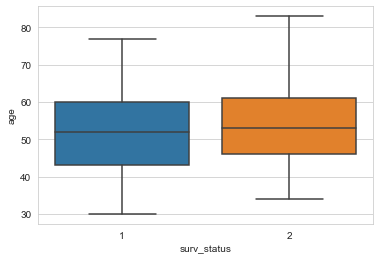

In [102]:
sns.boxplot(x='surv_status',y='age', data=haberman_data)

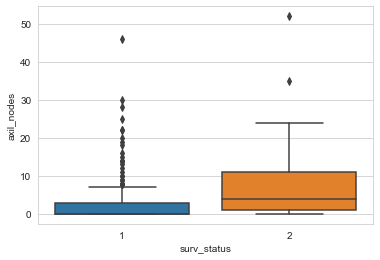

In [103]:
sns.boxplot(x='surv_status',y='axil_nodes', data=haberman_data)

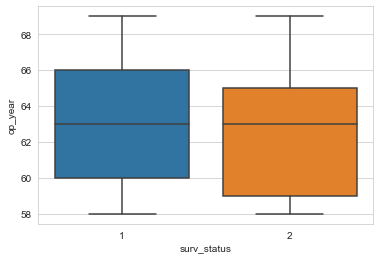

In [116]:
sns.boxplot(x='surv_status',y='op_year', data=haberman_data)

VIOLIN PLOTS are the combination of box plots and density functions.
- The white dot represents the median. 
- The edges of thicker dark line represent the quartiles.
- The egdes of the violin shaped structure represents the mininum and maximum
- The width of the shape represents the density/frequency of data points at that value.


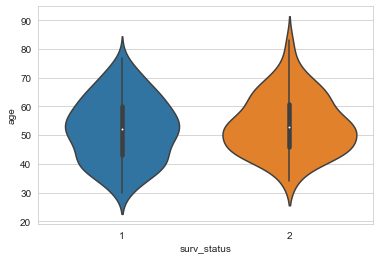

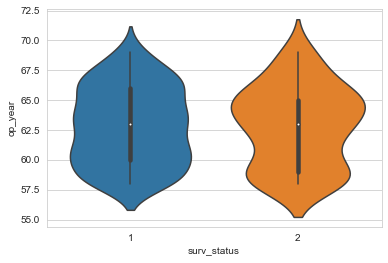

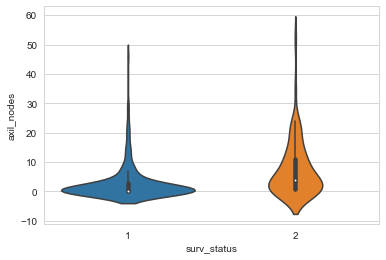

In [112]:
sns.violinplot(x='surv_status',y='age', data=haberman_data)
plt.show()

sns.violinplot(x='surv_status',y='op_year', data=haberman_data)
plt.show()

sns.violinplot(x='surv_status',y='axil_nodes', data=haberman_data)
plt.show()


Observations  :
- Patients with age 75-90 are less likely to not survive and patients with age 30-40 are more likely to survive. 
- The operation year doesnt seem to give exact information as it is almost equally spread throughout the given years.
- Patients with low node value are more likely to survive. 
    

# Bi-variate analysis

SCATTER PLOT : Scatter plots are widely used to compare 2 variables and help us analyse how the target variable is dependent on their combination. 
In scatter plot, the X-axis represents one independent variable and Y-axis represents the other independent variable. 
The target variable can be denoted with color coding by giving it to the hue parameter in the facetgrid function provided by seaborn.

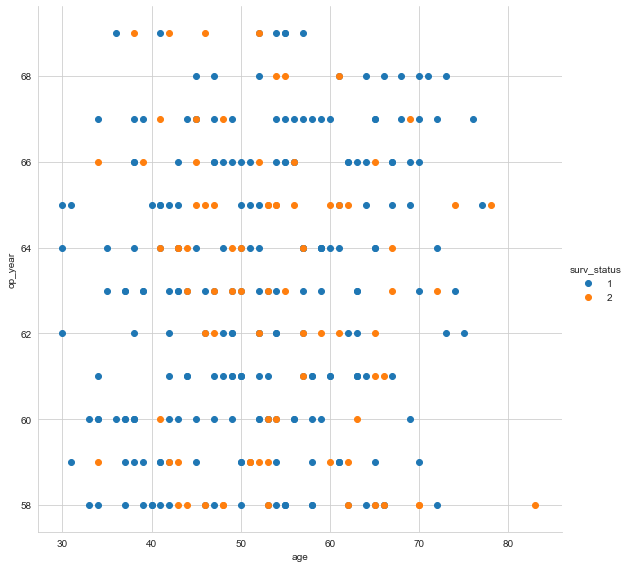

In [113]:
sns.FacetGrid(haberman_data, hue="surv_status", height=8) \
   .map(plt.scatter, "age", "op_year") \
   .add_legend();

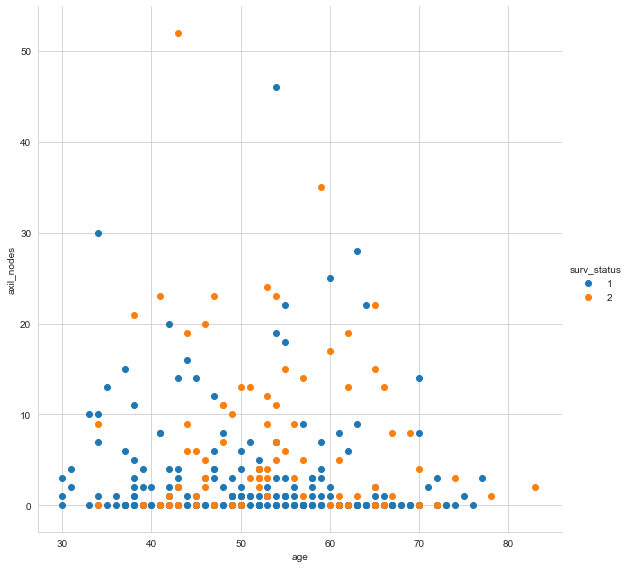

In [114]:
sns.FacetGrid(haberman_data, hue="surv_status", height=8) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();

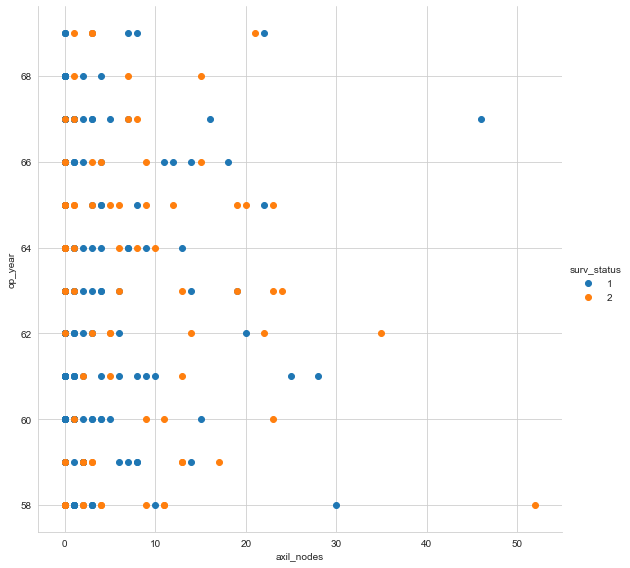

In [115]:
sns.FacetGrid(haberman_data, hue="surv_status", height=8) \
   .map(plt.scatter, "axil_nodes", "op_year") \
   .add_legend();

PAIR PLOTS

Pair plots are used to compare each and every variable with each and every variable with just a single line of code. This can be thought of like all the possible scatter plots. Pair plots can be used when the number of features are less. In this example with 3 independent variables, the number of pair plots are 9(3X3). So for any data with 10 features, the number of pair plots would be 100. Hence, Pair plots are usually used when the number of features are less(~5).

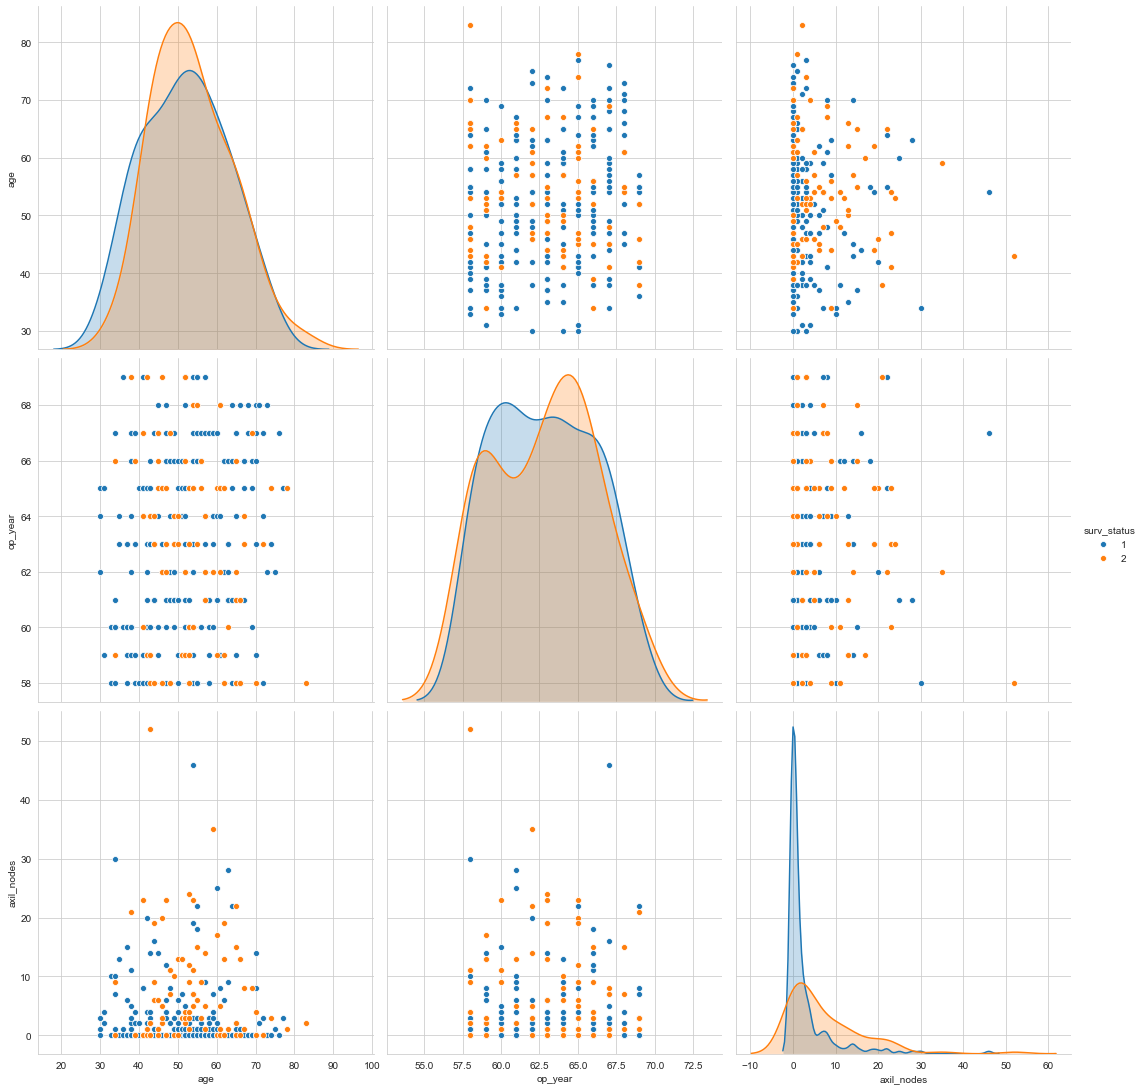

In [81]:
sns.pairplot(haberman_data, hue="surv_status", height=5)

Conclusions :
- Patients below 40 are likely to have higher rate of survival and patients above 75 are likely to have lower rate of survival.
- Lower are axillary node, higher is the survival chance.
- However, either of the three variables age, operation year or axillary nodes arent enough to exactly determine the survival rateof the patient and the data set is imbalanced. Hence, classification is difficult.   